In [73]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [74]:
df = pd.read_csv('weight_height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [75]:
df.corr()['Height']

Height    1.000000
Weight    0.922975
Name: Height, dtype: float64

In [76]:
df.shape

(8555, 3)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [78]:
df.describe

<bound method NDFrame.describe of       Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
8550  Female  60.483946  110.565497
8551  Female  63.423372  129.921671
8552  Female  65.584057  155.942671
8553  Female  67.429971  151.678405
8554  Female  60.921791  131.253738

[8555 rows x 3 columns]>

In [79]:
df.isnull()

,Gender,Height,Weight
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
8550,False,False,False
8551,False,False,False
8552,False,False,False
8553,False,False,False


In [80]:
# Encoding the gender column using LabelEncoder

In [81]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [82]:
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [83]:
df.Height.unique

<bound method Series.unique of 0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
8550    60.483946
8551    63.423372
8552    65.584057
8553    67.429971
8554    60.921791
Name: Height, Length: 8555, dtype: float64>

In [84]:
# Separation of x & y

In [85]:
x = df.drop('Weight', axis=1)
y = df[['Weight']]

In [86]:
# Train = 70% & Test = 30%

In [87]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x,y,train_size=0.70, random_state=42)

In [88]:
xtrain

,Gender,Height
553,1,67.594031
1397,1,71.601697
7934,0,62.625985
8367,0,66.136131
3320,1,71.843308
...,...,...
5734,0,63.349988
5191,0,58.861625
5390,0,64.325406
860,1,69.074492


In [89]:
# Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(xtrain, ytrain)

LinearRegression()

In [91]:
lr.coef_

array([[19.54151693,  5.9562333 ]])

In [92]:
lr.intercept_

array([-243.79306042])

In [93]:
# Evaluate the model

# Predicted Weight:

In [94]:
lr.predict([[1, 71.843308]])

array([[203.66396004]])

In [95]:
lr.predict(xtest)
print(xtest)

      Gender     Height
6006       0  64.846644
1197       1  68.886367
2862       1  70.963369
6497       0  62.737189
2860       1  69.578030
...      ...        ...
184        1  71.935887
2988       1  67.616383
6048       0  58.213614
420        1  69.689795
5669       0  64.997610

[2567 rows x 2 columns]


In [96]:
from sklearn.metrics import mean_squared_error as mse
pred = lr.predict(xtest)

mse = mse(ytest, pred)

In [97]:
mse # Mean_Squared_Error

96.83734437830608

In [98]:
from sklearn.metrics import mean_absolute_error as mae
mae(ytest, pred) # Mean_Abslute_Error

7.870097130738319

In [99]:
# Accuracy 

In [100]:
lr.score(xtest, ytest) # lr

0.905911242442266

In [101]:
lr.score(xtrain, ytrain) # Training Accuracy 

0.8973793060969246

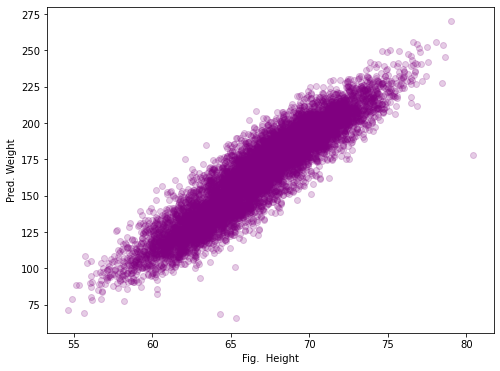

In [102]:
plt.figure(figsize=(8,6))
plt.scatter(df['Height'], df['Weight'], alpha=0.2, color='purple')
plt.xlabel('Fig.  Height')
plt.ylabel('Pred. Weight')
plt.show()



# K-NN Regressor

In [103]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [104]:
knn.fit(xtrain, ytrain)

KNeighborsRegressor()

# Accuracy

In [105]:
knn.score(xtest, ytest) # knn

0.8821086423439015

# MSE

In [106]:
from sklearn.metrics import mean_squared_error as mse
knn_pred = knn.predict(xtest)

mse = mse(ytest, knn_pred)
mse

121.33528273624482

# Prediction

In [107]:
print(knn.predict(xtest)) # predicted ytest

[[142.1445657 ]
 [181.38276924]
 [187.07075266]
 ...
 [101.79654426]
 [192.43702356]
 [145.3632227 ]]


In [108]:
# Tuning

In [109]:
# Random Forest Classifier

In [110]:
n_neighbors = np.random.randint(5,100,5)
weights= ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size= np.random.randint(5,50,5)
p = [1,2]


In [111]:
ids = {
    'n_neighbors'     : n_neighbors,
    'weights'         : weights,
    'algorithm'       : algorithm,
    'leaf_size'       : leaf_size,
    'p'               : p
}


print(ids)

{'n_neighbors': array([40, 95, 79, 22, 85]), 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': array([45, 41,  5, 36, 41]), 'p': [1, 2]}


In [112]:
from sklearn.model_selection import RandomizedSearchCV

In [113]:
rcv = RandomizedSearchCV(knn, ids, n_iter = 200, cv=3)

In [114]:
rcv.fit(xtrain, ytrain) 

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=200,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([45, 41,  5, 36, 41]),
                                        'n_neighbors': array([40, 95, 79, 22, 85]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [115]:
rcv.cv_results_

{'mean_fit_time': array([0.00296259, 0.0018487 , 0.00266584, 0.00263397, 0.00285633,
        0.0029877 , 0.00264104, 0.00321722, 0.00167871, 0.00178496,
        0.00289043, 0.00182104, 0.00290362, 0.0031453 , 0.00270224,
        0.00264144, 0.00272067, 0.00297022, 0.00166957, 0.00168165,
        0.00265336, 0.00263898, 0.00263651, 0.002635  , 0.00263643,
        0.00271185, 0.00282526, 0.0031666 , 0.00167338, 0.00267069,
        0.00262626, 0.00166837, 0.00299764, 0.00264001, 0.00263731,
        0.0026296 , 0.00280801, 0.00267402, 0.00263731, 0.00167942,
        0.00180825, 0.0018177 , 0.001731  , 0.00265551, 0.00263087,
        0.00298301, 0.00271106, 0.00282399, 0.00168435, 0.0017825 ,
        0.00286746, 0.0027194 , 0.00167092, 0.00265837, 0.00167569,
        0.00178099, 0.00174801, 0.00268078, 0.00265694, 0.0026478 ,
        0.00263937, 0.00263596, 0.00297642, 0.00167894, 0.00268157,
        0.00303745, 0.00265845, 0.00264271, 0.0026377 , 0.00175738,
        0.00293303, 0.00179919,

In [116]:
cv_result = pd.DataFrame(rcv.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002963,0.000279,0.017258,0.000982,distance,2,85,41,auto,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.868723,0.883174,0.885800,0.879232,0.007508,132
1,0.001849,0.000159,0.096587,0.014711,uniform,1,22,41,brute,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.881147,0.894990,0.899538,0.891892,0.007821,59
2,0.002666,0.000045,0.010137,0.000118,distance,2,40,41,kd_tree,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.865780,0.881189,0.883289,0.876753,0.007806,172
3,0.002634,0.000043,0.009955,0.000078,uniform,2,40,36,auto,"{'weights': 'uniform', 'p': 2, 'n_neighbors': ...",0.883365,0.897066,0.900337,0.893589,0.007352,7
4,0.002856,0.000019,0.056295,0.001200,distance,1,79,45,ball_tree,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.868555,0.883189,0.885831,0.879192,0.007598,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.001804,0.000030,0.111409,0.004044,distance,2,79,41,brute,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",0.868489,0.883090,0.885646,0.879075,0.007558,153
196,0.002982,0.000122,0.040080,0.003297,distance,1,40,41,ball_tree,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.865822,0.881240,0.883336,0.876799,0.007809,163
197,0.002652,0.000026,0.009060,0.000087,uniform,1,22,41,auto,"{'weights': 'uniform', 'p': 1, 'n_neighbors': ...",0.881147,0.894990,0.899538,0.891892,0.007821,59
198,0.002816,0.000048,0.030402,0.000736,distance,1,22,36,ball_tree,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",0.862239,0.878053,0.880190,0.873494,0.008006,181


In [117]:
rcv.best_score_

0.8936747913715797

In [118]:
rcv.best_params_

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 40,
 'leaf_size': 36,
 'algorithm': 'brute'}

In [119]:
tuned_knn = rcv.best_estimator_
tuned_knn

KNeighborsRegressor(algorithm='brute', leaf_size=36, n_neighbors=40, p=1)

In [120]:
tuned_knn.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='brute', leaf_size=36, n_neighbors=40, p=1)

In [121]:
tuned_knn.score(xtest, ytest) # tuned_knn

0.9032213851624448

In [122]:
tuned_knn.score(x,y)

0.9001707234792404

In [123]:
# Difference between tuned knn and knn

In [124]:
0.9036248605818604 - 0.8821086423439015

0.021516218237958906

In [125]:
# Difference between tuned knn and lr

In [126]:
0.9036248605818604 - 0.905911242442266 

-0.0022863818604055286

In [127]:
pred_2 = tuned_knn.predict(xtest)
mse = mae(ytest, pred_2)
mse

7.973486825378652

In [128]:
mae = mae(ytest , pred_2)
mae

7.973486825378652

In [129]:
# KNN Classifier

In [130]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [131]:
df1 = df.copy()

x1 = df1.drop('Gender', axis=1)
y1 = df1['Gender']

In [132]:
x1.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [133]:
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [134]:
x1train, x1test,y1train, y1test = tts(x1, y1,test_size=.30, random_state=42)

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=8)

knn_clf.fit(x1train, y1train)

KNeighborsClassifier(n_neighbors=8)

In [136]:
y1_pred = knn_clf.predict(x1test)

In [137]:
knn_clf.score(x1test, y1test)

0.9181924425399299

In [138]:
knn_clf.score(x1train, y1train)

0.9236806947227789

In [139]:
knn_clf.score(x1, y1)

0.9220338983050848

In [140]:
# Confusion Matrix; ROC curve; 

In [141]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [142]:
print(classification_report(y1test, y1_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1066
           1       0.93      0.93      0.93      1501

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



In [143]:
confusion_matrix(y1test, y1_pred)

array([[ 966,  100],
       [ 110, 1391]])

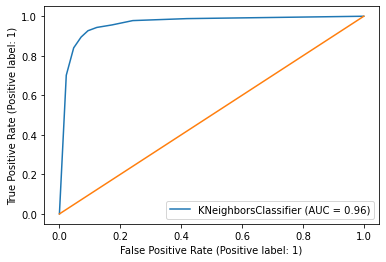

In [145]:
import matplotlib.pyplot as plt
plot_roc_curve(knn_clf, x1test, y1test)
plt.plot([0,1], [0,1])